# Face Generation

In this project, you'll define and train a DCGAN on a dataset of faces. Your goal is to get a generator network to generate *new* images of faces that look as realistic as possible!

The project will be broken down into a series of tasks from **loading in data to defining and training adversarial networks**. At the end of the notebook, you'll be able to visualize the results of your trained Generator to see how it performs; your generated samples should look like fairly realistic faces with small amounts of noise.

### Get the Data

You'll be using the [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) to train your adversarial networks.

This dataset is more complex than the number datasets (like MNIST or SVHN) you've been working with, and so, you should prepare to define deeper networks and train them for a longer time to get good results. It is suggested that you utilize a GPU for training.

### Pre-processed Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. Some sample data is show below.

<img src='assets/processed_face_data.png' width=60% />

> If you are working locally, you can download this data [by clicking here](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip)

This is a zip file that you'll need to extract in the home directory of this notebook for further loading and processing. After extracting the data, you should be left with a directory of data `processed_celeba_small/`

In [1]:
# can comment out after executing
!unzip processed_celeba_small.zip

Archive:  processed_celeba_small.zip
replace processed_celeba_small/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [7]:
data_dir = 'processed_celeba_small/'

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import problem_unittests as tests
#import helper

%matplotlib inline

## Visualize the CelebA Data

The [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations. Since you're going to be generating faces, you won't need the annotations, you'll only need the images. Note that these are color images with [3 color channels (RGB)](https://en.wikipedia.org/wiki/Channel_(digital_image)#RGB_Images) each.

### Pre-process and Load the Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. This *pre-processed* dataset is a smaller subset of the very large CelebA data.

> There are a few other steps that you'll need to **transform** this data and create a **DataLoader**.

#### Exercise: Complete the following `get_dataloader` function, such that it satisfies these requirements:

* Your images should be square, Tensor images of size `image_size x image_size` in the x and y dimension.
* Your function should return a DataLoader that shuffles and batches these Tensor images.

#### ImageFolder

To create a dataset given a directory of images, it's recommended that you use PyTorch's [ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) wrapper, with a root directory `processed_celeba_small/` and data transformation passed in.

In [24]:
# necessary imports
import torch
from torchvision import datasets
from torchvision import transforms

In [25]:
def get_dataloader(batch_size, image_size, data_dir='processed_celeba_small/'):
    """
    Batch the neural network data using DataLoader
    :param batch_size: The size of each batch; the number of images in a batch
    :param img_size: The square size of the image data (x, y)
    :param data_dir: Directory where image data is located
    :return: DataLoader with batched data
    """
    # TODO: Implement function and return a dataloader
    transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor()
        ])
    
    celeb_dataset = datasets.ImageFolder(data_dir, transform=transform)
    dataloader = torch.utils.data.DataLoader(celeb_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=0)
    
    return dataloader


## Create a DataLoader

#### Exercise: Create a DataLoader `celeba_train_loader` with appropriate hyperparameters.

Call the above function and create a dataloader to view images. 
* You can decide on any reasonable `batch_size` parameter
* Your `image_size` **must be** `32`. Resizing the data to a smaller size will make for faster training, while still creating convincing images of faces!

In [26]:
# Define function hyperparameters
batch_size = 64
img_size = 32

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# Call your function and get a dataloader
celeba_train_loader = get_dataloader(batch_size, img_size)


Next, you can view some images! You should seen square images of somewhat-centered faces.

Note: You'll need to convert the Tensor images into a NumPy type and transpose the dimensions to correctly display an image, suggested `imshow` code is below, but it may not be perfect.

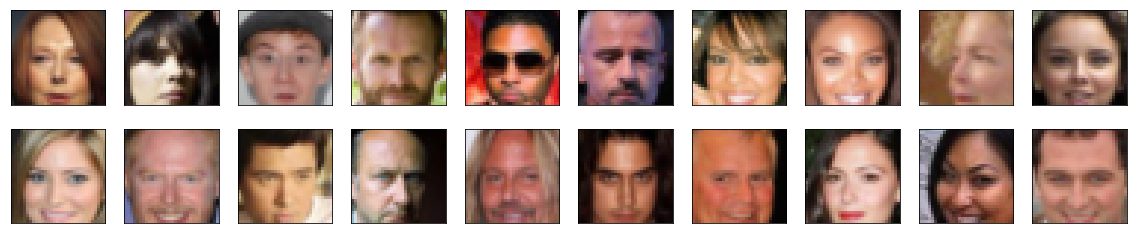

In [27]:
# helper display function
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# obtain one batch of training images
dataiter = iter(celeba_train_loader)
images, _ = dataiter.next() # _ for no labels

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

#### Exercise: Pre-process your image data and scale it to a pixel range of -1 to 1

You need to do a bit of pre-processing; you know that the output of a `tanh` activated generator will contain pixel values in a range from -1 to 1, and so, we need to rescale our training images to a range of -1 to 1. (Right now, they are in a range from 0-1.)

In [28]:
# TODO: Complete the scale function
def scale(x, feature_range=(-1, 1)):
    ''' Scale takes in an image x and returns that image, scaled
       with a feature_range of pixel values from -1 to 1. 
       This function assumes that the input x is already scaled from 0-1.'''
    # assume x is scaled to (0, 1)
    # scale to feature_range and return scaled x
    
    scaled_image = (feature_range[1]-feature_range[0]) * x + feature_range[0]
    
    return scaled_image


In [29]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# check scaled range
# should be close to -1 to 1
img = images[0]
scaled_img = scale(img)

print('Min: ', scaled_img.min())
print('Max: ', scaled_img.max())

Min:  tensor(-0.9529)
Max:  tensor(0.9608)


---
# Define the Model

A GAN is comprised of two adversarial networks, a discriminator and a generator.

## Discriminator

Your first task will be to define the discriminator. This is a convolutional classifier like you've built before, only without any maxpooling layers. To deal with this complex data, it's suggested you use a deep network with **normalization**. You are also allowed to create any helper functions that may be useful.

#### Exercise: Complete the Discriminator class
* The inputs to the discriminator are 32x32x3 tensor images
* The output should be a single value that will indicate whether a given image is real or fake


In [30]:
import torch.nn as nn
import torch.nn.functional as F

In [31]:
# helper conv function
def conv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True):
    """Creates a convolutional layer, with optional batch normalization.
    """
    layers = []
    conv_layer = nn.Conv2d(in_channels, out_channels, 
                           kernel_size, stride, padding, bias=False)
    
    # append conv layer
    layers.append(conv_layer)

    if batch_norm:
        # append batchnorm layer
        layers.append(nn.BatchNorm2d(out_channels))
     
    # using Sequential container
    return nn.Sequential(*layers)

In [32]:
class Discriminator(nn.Module):

    def __init__(self, conv_dim):
        """
        Initialize the Discriminator Module
        :param conv_dim: The depth of the first convolutional layer
        """
        super(Discriminator, self).__init__()

        # complete init function
        self.conv_dim = conv_dim
        self.num_convs = 4
        # complete init function
        # initial image size: 32 x 32
        self.conv_1 = conv(in_channels=3, out_channels=conv_dim, kernel_size=4, batch_norm=False) 
        # spatial dimensions of output: 16 x 16
        self.conv_2 = conv(in_channels=conv_dim, out_channels=conv_dim*2, kernel_size=4) 
        # spatial dimensions of output: 8 x 8
        self.conv_3 = conv(in_channels=conv_dim*2, out_channels=conv_dim*4, kernel_size=4)
        # spatial dimensions of output: 4 x 4
        self.conv_4 = conv(in_channels=conv_dim*4, out_channels=conv_dim*8, kernel_size=4) 
        # spatial dimensions of output: 2 x 2
        self.fc = nn.Linear(2*2*conv_dim*8, 1) # one output!

    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: Discriminator logits; the output of the neural network
        """
        # define feedforward behavior
        x = self.conv_1(x)
        x = F.leaky_relu(x, 0.2)
        x = self.conv_2(x)
        x = F.leaky_relu(x, 0.2)
        x = self.conv_3(x)
        x = F.leaky_relu(x, 0.2)
        x = self.conv_4(x)
        x = F.leaky_relu(x)
        x = x.view(-1, 2*2*self.conv_dim*8)
        x = self.fc(x)
        return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(Discriminator)

Tests Passed


In [33]:
class Discriminator(nn.Module):

    def __init__(self, conv_dim=32):
        super(Discriminator, self).__init__()

        self.conv_dim = conv_dim
        self.num_convs = 4
        # complete init function
        self.conv_1 = conv(in_channels=3, out_channels=conv_dim, kernel_size=4, batch_norm=False) # 16
        self.conv_2 = conv(in_channels=conv_dim, out_channels=conv_dim*2, kernel_size=4, batch_norm=True) # 8
        self.conv_3 = conv(in_channels=conv_dim*2, out_channels=conv_dim*4, kernel_size=4, batch_norm=True) # 4
        self.conv_4 = conv(in_channels=conv_dim*4, out_channels=conv_dim*8, kernel_size=4, batch_norm=True) # 2
    
        self.fc = nn.Linear(2*2*conv_dim*8, 1)

    def forward(self, x):
        # complete forward function
        x = self.conv_1(x)
        x = F.leaky_relu(x, 0.2)
        x = self.conv_2(x)
        x = F.leaky_relu(x, 0.2)
        x = self.conv_3(x)
        x = F.leaky_relu(x, 0.2)
        x = self.conv_4(x)
        x = F.leaky_relu(x)
        x = x.view(-1, 2*2*self.conv_dim*2**(self.num_convs-1))
        x = self.fc(x)
        
        return x
    

## Generator

The generator should upsample an input and generate a *new* image of the same size as our training data `32x32x3`. This should be mostly transpose convolutional layers with normalization applied to the outputs.

#### Exercise: Complete the Generator class
* The inputs to the generator are vectors of some length `z_size`
* The output should be a image of shape `32x32x3`

In [34]:
# helper deconv function
def deconv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True):
    """Creates a transposed-convolutional layer, with optional batch normalization.
    """
    ## TODO: Complete this function
    ## create a sequence of transpose + optional batch norm layers
    layers = []
    transpose_conv_layer = nn.ConvTranspose2d(in_channels, out_channels, 
                           kernel_size, stride, padding, bias=False)
    
    # append conv layer
    layers.append(transpose_conv_layer)

    if batch_norm:
        # append batchnorm layer
        layers.append(nn.BatchNorm2d(out_channels))
     
    # using Sequential container
    return nn.Sequential(*layers)


In [35]:
class Generator(nn.Module):
    
    def __init__(self, z_size, conv_dim):
        """
        Initialize the Generator Module
        :param z_size: The length of the input latent vector, z
        :param conv_dim: The depth of the inputs to the *last* transpose convolutional layer
        """
        super(Generator, self).__init__()

        # complete init function
        self.num_transpose_layers = 4
        fc_out_channels = conv_dim*2**(self.num_transpose_layers - 1)
        
        self.fc = nn.Linear(z_size, 2*2*fc_out_channels)
        self.t_conv_1 = deconv(fc_out_channels, fc_out_channels // 2, kernel_size=4)
        self.t_conv_2 = deconv(fc_out_channels // 2, fc_out_channels // 4, kernel_size=4)
        self.t_conv_3 = deconv(fc_out_channels // 4, fc_out_channels //8, kernel_size=4)
        self.t_conv_4 = deconv(fc_out_channels // 8, 3, kernel_size=4, batch_norm=False) # output is a RGB image
        self.output_dim = 2
        self.fc_out_channels = fc_out_channels
        
    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: A 32x32x3 Tensor image as output
        """
        # define feedforward behavior
        x = self.fc(x)
        x = x.view(-1, self.fc_out_channels, self.output_dim, self.output_dim) # batch_size, depth, 2, 2
        x = F.relu(self.t_conv_1(x))
        x = F.relu(self.t_conv_2(x))
        x = F.relu(self.t_conv_3(x))
        x = F.tanh(self.t_conv_4(x))
        return x

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(Generator)

Tests Passed


## Initialize the weights of your networks

To help your models converge, you should initialize the weights of the convolutional and linear layers in your model. From reading the [original DCGAN paper](https://arxiv.org/pdf/1511.06434.pdf), they say:
> All weights were initialized from a zero-centered Normal distribution with standard deviation 0.02.

So, your next task will be to define a weight initialization function that does just this!

You can refer back to the lesson on weight initialization or even consult existing model code, such as that from [the `networks.py` file in CycleGAN Github repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/models/networks.py) to help you complete this function.

#### Exercise: Complete the weight initialization function

* This should initialize only **convolutional** and **linear** layers
* Initialize the weights to a normal distribution, centered around 0, with a standard deviation of 0.02.
* The bias terms, if they exist, may be left alone or set to 0.

In [36]:
from torch.nn import init

def weights_init_normal(m):
    """
    Applies initial weights to certain layers in a model .
    The weights are taken from a normal distribution 
    with mean = 0, std dev = 0.02.
    :param m: A module or layer in a network    
    """
    # classname will be something like:
    # `Conv`, `BatchNorm2d`, `Linear`, etc.
    classname = m.__class__.__name__
    
    # TODO: Apply initial weights to convolutional and linear layers
    if classname.find("Conv") != -1 or classname.find("Linear")!=-1:
        init.normal_(m.weight.data, mean=0.0, std=0.02)

## Build complete network

Define your models' hyperparameters and instantiate the discriminator and generator from the classes defined above. Make sure you've passed in the correct input arguments.

In [37]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
def build_network(d_conv_dim, g_conv_dim, z_size):
    # define discriminator and generator
    D = Discriminator(d_conv_dim)
    G = Generator(z_size=z_size, conv_dim=g_conv_dim)

    # initialize model weights
    D.apply(weights_init_normal)
    G.apply(weights_init_normal)

    print(D)
    print()
    print(G)
    
    return D, G


#### Exercise: Define model hyperparameters

In [38]:
# Define model hyperparams
d_conv_dim = 32
g_conv_dim = 32
z_size = 100

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
D, G = build_network(d_conv_dim, g_conv_dim, z_size)

Discriminator(
  (conv_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  )
  (conv_2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv_3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv_4): Sequential(
    (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

Generator(
  (fc): Linear(in_features=100, out_features=1024, bias=True)
  (t_conv_1): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=F

### Training on GPU

Check if you can train on GPU. Here, we'll set this as a boolean variable `train_on_gpu`. Later, you'll be responsible for making sure that 
>* Models,
* Model inputs, and
* Loss function arguments

Are moved to GPU, where appropriate.

In [39]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import torch

# Check for a GPU
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Training on GPU!')

Training on GPU!


---
## Discriminator and Generator Losses

Now we need to calculate the losses for both types of adversarial networks.

### Discriminator Losses

> * For the discriminator, the total loss is the sum of the losses for real and fake images, `d_loss = d_real_loss + d_fake_loss`. 
* Remember that we want the discriminator to output 1 for real images and 0 for fake images, so we need to set up the losses to reflect that.


### Generator Loss

The generator loss will look similar only with flipped labels. The generator's goal is to get the discriminator to *think* its generated images are *real*.

#### Exercise: Complete real and fake loss functions

**You may choose to use either cross entropy or a least squares error loss to complete the following `real_loss` and `fake_loss` functions.**

In [45]:
def real_loss(D_out):
    '''Calculates how close discriminator outputs are to being real.
       param, D_out: discriminator logits
       return: real loss'''
    batch_size = D_out.size(0)
    
    # label smoothing
    labels = torch.ones(batch_size)*0.9
    
    # move labels to GPU if available     
    if train_on_gpu:
        labels = labels.cuda()
    
    # binary cross entropy with logits loss
    criterion = nn.BCEWithLogitsLoss()
    
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

def fake_loss(D_out):
    '''Calculates how close discriminator outputs are to being fake.
       param, D_out: discriminator logits
       return: fake loss'''
    batch_size = D_out.size(0)
    
    labels = torch.zeros(batch_size) # fake labels = 0
    
    if train_on_gpu:
        labels = labels.cuda()
    
    criterion = nn.BCEWithLogitsLoss()
    
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

## Optimizers

#### Exercise: Define optimizers for your Discriminator (D) and Generator (G)

Define optimizers for your models with appropriate hyperparameters.

In [46]:
import torch.optim as optim



# params according to the paper "Unsupervised representation learning with DCGANs"
lr = 0.0002
beta1=0.5
beta2=0.999 # default

# Create optimizers for the discriminator D and generator G
d_optimizer = optim.Adam(D.parameters(), lr, [beta1, beta2])
g_optimizer = optim.Adam(G.parameters(), lr, [beta1, beta2])

---
## Training

Training will involve alternating between training the discriminator and the generator. You'll use your functions `real_loss` and `fake_loss` to help you calculate the discriminator losses.

* You should train the discriminator by alternating on real and fake images
* Then the generator, which tries to trick the discriminator and should have an opposing loss function


#### Saving Samples

You've been given some code to print out some loss statistics and save some generated "fake" samples.

#### Exercise: Complete the training function

Keep in mind that, if you've moved your models to GPU, you'll also have to move any model inputs to GPU.

In [47]:
def train(D, G, n_epochs, print_every=50):
    '''Trains adversarial networks for some number of epochs
       param, D: the discriminator network
       param, G: the generator network
       param, n_epochs: number of epochs to train for
       param, print_every: when to print and record the models' losses
       return: D and G losses'''
    
    # move models to GPU
    if train_on_gpu:
        D.cuda()
        G.cuda()

    # keep track of loss and generated, "fake" samples
    samples = []
    losses = []

    # Get some fixed data for sampling. These are images that are held
    # constant throughout training, and allow us to inspect the model's performance
    sample_size=16
    fixed_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
    fixed_z = torch.from_numpy(fixed_z).float()
    # move z to GPU if available
    if train_on_gpu:
        fixed_z = fixed_z.cuda()

    # epoch training loop
    for epoch in range(n_epochs):

        # batch training loop
        for batch_i, (real_images, _) in enumerate(celeba_train_loader):

            batch_size = real_images.size(0)
            real_images = scale(real_images)

            # ===============================================
            #         YOUR CODE HERE: TRAIN THE NETWORKS
            # ===============================================
            
            # 1. Train the discriminator on real and fake images
            d_optimizer.zero_grad()
        
            # 1.1 Train with real images
            # Compute the discriminator losses on real images 
            if train_on_gpu:
                real_images = real_images.cuda()

            D_real = D(real_images)
            d_real_loss = real_loss(D_real)

            # 1.2 Train with fake images

            # Generate fake images
            z = np.random.uniform(-1, 1, size=(batch_size, z_size))
            z = torch.from_numpy(z).float()
            # move x to GPU, if available
            if train_on_gpu:
                z = z.cuda()
            fake_images = G(z)

            # Compute the discriminator losses on fake images            
            D_fake = D(fake_images)
            d_fake_loss = fake_loss(D_fake)
        
            # add up loss and perform backprop
            d_loss = d_real_loss + d_fake_loss
            d_loss.backward()
            d_optimizer.step()

            # 2. Train the generator with an adversarial loss
            g_optimizer.zero_grad()
        
            # 2.1 Train with fake images and flipped labels

            # Generate fake images
            z = np.random.uniform(-1, 1, size=(batch_size, z_size))
            z = torch.from_numpy(z).float()
            if train_on_gpu:
                z = z.cuda()
            fake_images = G(z)

            # Compute the discriminator losses on fake images 
            # using flipped labels!
            D_fake = D(fake_images)
            g_loss = real_loss(D_fake) # use real loss to flip labels

            # perform backprop
            g_loss.backward()
            g_optimizer.step()

            
            # ===============================================
            #              END OF YOUR CODE
            # ===============================================

            # Print some loss stats
            if batch_i % print_every == 0:
                # append discriminator loss and generator loss
                losses.append((d_loss.item(), g_loss.item()))
                # print discriminator and generator loss
                print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                        epoch+1, n_epochs, d_loss.item(), g_loss.item()))


        ## AFTER EACH EPOCH##    
        # this code assumes your generator is named G, feel free to change the name
        # generate and save sample, fake images
        G.eval() # for generating samples
        samples_z = G(fixed_z)
        samples.append(samples_z)
        G.train() # back to training mode

    # Save training generator samples
    with open('train_samples.pkl', 'wb') as f:
        pkl.dump(samples, f)
    
    # finally return losses
    return losses

Set your number of training epochs and train your GAN!

In [48]:
# set number of epochs 
n_epochs = 100


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# call training function
losses = train(D, G, n_epochs=n_epochs)

Epoch [    1/  100] | d_loss: 1.3411 | g_loss: 0.9736
Epoch [    1/  100] | d_loss: 0.4697 | g_loss: 3.2208
Epoch [    1/  100] | d_loss: 0.3669 | g_loss: 4.1621
Epoch [    1/  100] | d_loss: 1.1263 | g_loss: 4.0328
Epoch [    1/  100] | d_loss: 0.5857 | g_loss: 2.5967
Epoch [    1/  100] | d_loss: 0.5290 | g_loss: 3.2181
Epoch [    1/  100] | d_loss: 0.6229 | g_loss: 2.2712
Epoch [    1/  100] | d_loss: 1.1766 | g_loss: 1.0589
Epoch [    1/  100] | d_loss: 0.9279 | g_loss: 1.2493
Epoch [    1/  100] | d_loss: 0.7844 | g_loss: 1.5073
Epoch [    1/  100] | d_loss: 0.6909 | g_loss: 2.0261
Epoch [    1/  100] | d_loss: 0.6856 | g_loss: 2.6795
Epoch [    1/  100] | d_loss: 0.9543 | g_loss: 1.3903
Epoch [    1/  100] | d_loss: 0.6576 | g_loss: 2.2123
Epoch [    1/  100] | d_loss: 0.9995 | g_loss: 2.1584
Epoch [    1/  100] | d_loss: 0.9118 | g_loss: 1.7720
Epoch [    1/  100] | d_loss: 0.9329 | g_loss: 2.6137
Epoch [    1/  100] | d_loss: 0.8363 | g_loss: 2.2669
Epoch [    1/  100] | d_loss

Epoch [    6/  100] | d_loss: 0.9163 | g_loss: 2.1553
Epoch [    6/  100] | d_loss: 0.7822 | g_loss: 1.7766
Epoch [    6/  100] | d_loss: 0.7592 | g_loss: 1.7526
Epoch [    6/  100] | d_loss: 0.6019 | g_loss: 3.0135
Epoch [    6/  100] | d_loss: 1.0757 | g_loss: 2.7001
Epoch [    6/  100] | d_loss: 0.7867 | g_loss: 1.5202
Epoch [    6/  100] | d_loss: 0.7193 | g_loss: 2.2078
Epoch [    6/  100] | d_loss: 0.7707 | g_loss: 2.5548
Epoch [    6/  100] | d_loss: 0.8569 | g_loss: 1.2255
Epoch [    6/  100] | d_loss: 0.8528 | g_loss: 1.5826
Epoch [    6/  100] | d_loss: 0.7294 | g_loss: 1.9415
Epoch [    6/  100] | d_loss: 0.7655 | g_loss: 1.7983
Epoch [    6/  100] | d_loss: 0.6719 | g_loss: 1.7599
Epoch [    6/  100] | d_loss: 0.7175 | g_loss: 2.1427
Epoch [    6/  100] | d_loss: 0.6719 | g_loss: 2.1411
Epoch [    6/  100] | d_loss: 0.8965 | g_loss: 2.6524
Epoch [    6/  100] | d_loss: 0.9569 | g_loss: 1.4992
Epoch [    6/  100] | d_loss: 0.9758 | g_loss: 0.8341
Epoch [    6/  100] | d_loss

Epoch [   11/  100] | d_loss: 0.5702 | g_loss: 3.5675
Epoch [   11/  100] | d_loss: 0.5918 | g_loss: 1.9713
Epoch [   11/  100] | d_loss: 0.8683 | g_loss: 3.1143
Epoch [   11/  100] | d_loss: 0.6424 | g_loss: 1.3763
Epoch [   11/  100] | d_loss: 0.6236 | g_loss: 1.8641
Epoch [   11/  100] | d_loss: 0.7626 | g_loss: 2.3026
Epoch [   11/  100] | d_loss: 0.8494 | g_loss: 1.4302
Epoch [   11/  100] | d_loss: 0.5625 | g_loss: 2.5626
Epoch [   11/  100] | d_loss: 0.8830 | g_loss: 3.3263
Epoch [   11/  100] | d_loss: 0.7770 | g_loss: 2.7909
Epoch [   11/  100] | d_loss: 0.9457 | g_loss: 1.0106
Epoch [   11/  100] | d_loss: 0.6832 | g_loss: 1.7691
Epoch [   11/  100] | d_loss: 0.6885 | g_loss: 3.2292
Epoch [   11/  100] | d_loss: 1.0024 | g_loss: 2.7170
Epoch [   11/  100] | d_loss: 0.5573 | g_loss: 2.2106
Epoch [   12/  100] | d_loss: 0.9914 | g_loss: 3.2414
Epoch [   12/  100] | d_loss: 0.5677 | g_loss: 2.2452
Epoch [   12/  100] | d_loss: 0.7978 | g_loss: 2.5901
Epoch [   12/  100] | d_loss

Epoch [   16/  100] | d_loss: 0.8968 | g_loss: 1.3511
Epoch [   16/  100] | d_loss: 0.7626 | g_loss: 3.0803
Epoch [   16/  100] | d_loss: 0.4783 | g_loss: 1.8713
Epoch [   16/  100] | d_loss: 0.6195 | g_loss: 2.7012
Epoch [   16/  100] | d_loss: 0.4490 | g_loss: 2.0684
Epoch [   16/  100] | d_loss: 0.5884 | g_loss: 2.6110
Epoch [   16/  100] | d_loss: 0.5061 | g_loss: 2.5914
Epoch [   16/  100] | d_loss: 0.4942 | g_loss: 2.1362
Epoch [   17/  100] | d_loss: 0.5836 | g_loss: 3.7184
Epoch [   17/  100] | d_loss: 0.8387 | g_loss: 4.0588
Epoch [   17/  100] | d_loss: 0.4713 | g_loss: 3.0397
Epoch [   17/  100] | d_loss: 0.9681 | g_loss: 3.9231
Epoch [   17/  100] | d_loss: 0.5031 | g_loss: 2.0028
Epoch [   17/  100] | d_loss: 0.5462 | g_loss: 2.9771
Epoch [   17/  100] | d_loss: 0.6121 | g_loss: 4.1429
Epoch [   17/  100] | d_loss: 0.5740 | g_loss: 1.5520
Epoch [   17/  100] | d_loss: 0.8258 | g_loss: 4.2564
Epoch [   17/  100] | d_loss: 0.5914 | g_loss: 2.7986
Epoch [   17/  100] | d_loss

Epoch [   21/  100] | d_loss: 0.6561 | g_loss: 2.9323
Epoch [   22/  100] | d_loss: 1.6802 | g_loss: 5.2039
Epoch [   22/  100] | d_loss: 0.4296 | g_loss: 2.8696
Epoch [   22/  100] | d_loss: 0.6484 | g_loss: 3.0615
Epoch [   22/  100] | d_loss: 0.4209 | g_loss: 3.1453
Epoch [   22/  100] | d_loss: 0.5438 | g_loss: 3.8086
Epoch [   22/  100] | d_loss: 0.9553 | g_loss: 4.5987
Epoch [   22/  100] | d_loss: 0.4947 | g_loss: 2.6082
Epoch [   22/  100] | d_loss: 0.5978 | g_loss: 1.6148
Epoch [   22/  100] | d_loss: 0.5008 | g_loss: 3.6269
Epoch [   22/  100] | d_loss: 0.4626 | g_loss: 2.2909
Epoch [   22/  100] | d_loss: 0.4692 | g_loss: 3.6591
Epoch [   22/  100] | d_loss: 0.5279 | g_loss: 3.1135
Epoch [   22/  100] | d_loss: 0.7530 | g_loss: 3.3989
Epoch [   22/  100] | d_loss: 0.4762 | g_loss: 3.4616
Epoch [   22/  100] | d_loss: 0.4985 | g_loss: 2.7563
Epoch [   22/  100] | d_loss: 0.4686 | g_loss: 2.4130
Epoch [   22/  100] | d_loss: 0.6006 | g_loss: 2.5663
Epoch [   22/  100] | d_loss

Epoch [   27/  100] | d_loss: 0.4939 | g_loss: 2.9572
Epoch [   27/  100] | d_loss: 0.4419 | g_loss: 3.1961
Epoch [   27/  100] | d_loss: 0.9333 | g_loss: 3.0767
Epoch [   27/  100] | d_loss: 1.1143 | g_loss: 4.0285
Epoch [   27/  100] | d_loss: 0.4272 | g_loss: 3.2152
Epoch [   27/  100] | d_loss: 0.4486 | g_loss: 3.3638
Epoch [   27/  100] | d_loss: 0.4934 | g_loss: 3.9150
Epoch [   27/  100] | d_loss: 0.5467 | g_loss: 2.8230
Epoch [   27/  100] | d_loss: 0.5161 | g_loss: 2.2834
Epoch [   27/  100] | d_loss: 0.5355 | g_loss: 3.1290
Epoch [   27/  100] | d_loss: 0.4654 | g_loss: 3.0778
Epoch [   27/  100] | d_loss: 0.4194 | g_loss: 3.2681
Epoch [   27/  100] | d_loss: 0.4590 | g_loss: 3.4327
Epoch [   27/  100] | d_loss: 0.7686 | g_loss: 1.3616
Epoch [   27/  100] | d_loss: 0.4191 | g_loss: 4.4431
Epoch [   27/  100] | d_loss: 0.4276 | g_loss: 3.4238
Epoch [   27/  100] | d_loss: 0.5770 | g_loss: 4.0108
Epoch [   27/  100] | d_loss: 0.7407 | g_loss: 2.9538
Epoch [   27/  100] | d_loss

Epoch [   32/  100] | d_loss: 0.5902 | g_loss: 2.5141
Epoch [   32/  100] | d_loss: 0.4679 | g_loss: 2.9252
Epoch [   32/  100] | d_loss: 0.5433 | g_loss: 2.2189
Epoch [   32/  100] | d_loss: 0.3957 | g_loss: 3.9675
Epoch [   32/  100] | d_loss: 0.3939 | g_loss: 4.4139
Epoch [   32/  100] | d_loss: 0.6537 | g_loss: 2.5288
Epoch [   32/  100] | d_loss: 0.4060 | g_loss: 3.1762
Epoch [   32/  100] | d_loss: 1.2373 | g_loss: 1.5004
Epoch [   32/  100] | d_loss: 0.4179 | g_loss: 4.1095
Epoch [   32/  100] | d_loss: 0.5288 | g_loss: 3.4534
Epoch [   32/  100] | d_loss: 0.5347 | g_loss: 2.9919
Epoch [   32/  100] | d_loss: 0.6108 | g_loss: 3.3629
Epoch [   32/  100] | d_loss: 0.8358 | g_loss: 1.0054
Epoch [   32/  100] | d_loss: 0.7316 | g_loss: 1.0564
Epoch [   32/  100] | d_loss: 0.4666 | g_loss: 3.1468
Epoch [   32/  100] | d_loss: 0.5226 | g_loss: 3.4439
Epoch [   33/  100] | d_loss: 0.6351 | g_loss: 3.8197
Epoch [   33/  100] | d_loss: 0.4572 | g_loss: 3.3558
Epoch [   33/  100] | d_loss

Epoch [   37/  100] | d_loss: 0.4945 | g_loss: 2.6253
Epoch [   37/  100] | d_loss: 0.7805 | g_loss: 2.9751
Epoch [   37/  100] | d_loss: 0.4736 | g_loss: 2.8495
Epoch [   37/  100] | d_loss: 0.4281 | g_loss: 3.8604
Epoch [   37/  100] | d_loss: 0.6887 | g_loss: 2.7296
Epoch [   37/  100] | d_loss: 0.3891 | g_loss: 4.4328
Epoch [   37/  100] | d_loss: 0.5618 | g_loss: 2.0636
Epoch [   37/  100] | d_loss: 0.4745 | g_loss: 3.3676
Epoch [   37/  100] | d_loss: 0.3865 | g_loss: 3.4029
Epoch [   38/  100] | d_loss: 0.6474 | g_loss: 3.6538
Epoch [   38/  100] | d_loss: 0.4303 | g_loss: 3.4566
Epoch [   38/  100] | d_loss: 0.4348 | g_loss: 2.9965
Epoch [   38/  100] | d_loss: 0.4298 | g_loss: 2.4586
Epoch [   38/  100] | d_loss: 0.4398 | g_loss: 4.2297
Epoch [   38/  100] | d_loss: 0.3843 | g_loss: 3.5506
Epoch [   38/  100] | d_loss: 0.3966 | g_loss: 3.3540
Epoch [   38/  100] | d_loss: 0.3860 | g_loss: 4.5538
Epoch [   38/  100] | d_loss: 0.4283 | g_loss: 3.4655
Epoch [   38/  100] | d_loss

Epoch [   42/  100] | d_loss: 0.3948 | g_loss: 3.8283
Epoch [   42/  100] | d_loss: 0.6399 | g_loss: 1.8623
Epoch [   43/  100] | d_loss: 0.7973 | g_loss: 4.2805
Epoch [   43/  100] | d_loss: 0.4637 | g_loss: 4.3921
Epoch [   43/  100] | d_loss: 0.4593 | g_loss: 2.7619
Epoch [   43/  100] | d_loss: 0.5420 | g_loss: 2.4772
Epoch [   43/  100] | d_loss: 0.5029 | g_loss: 2.0217
Epoch [   43/  100] | d_loss: 0.6164 | g_loss: 2.1316
Epoch [   43/  100] | d_loss: 0.4148 | g_loss: 3.0450
Epoch [   43/  100] | d_loss: 0.4520 | g_loss: 4.1788
Epoch [   43/  100] | d_loss: 0.3868 | g_loss: 4.8314
Epoch [   43/  100] | d_loss: 0.4620 | g_loss: 3.0885
Epoch [   43/  100] | d_loss: 0.4090 | g_loss: 3.2158
Epoch [   43/  100] | d_loss: 0.4088 | g_loss: 4.9599
Epoch [   43/  100] | d_loss: 0.4289 | g_loss: 4.0358
Epoch [   43/  100] | d_loss: 0.4268 | g_loss: 3.4671
Epoch [   43/  100] | d_loss: 0.4818 | g_loss: 3.3466
Epoch [   43/  100] | d_loss: 0.4091 | g_loss: 2.6649
Epoch [   43/  100] | d_loss

Epoch [   48/  100] | d_loss: 0.4501 | g_loss: 3.6222
Epoch [   48/  100] | d_loss: 0.4021 | g_loss: 2.2397
Epoch [   48/  100] | d_loss: 0.3815 | g_loss: 4.1966
Epoch [   48/  100] | d_loss: 0.4367 | g_loss: 4.0568
Epoch [   48/  100] | d_loss: 0.8051 | g_loss: 5.0528
Epoch [   48/  100] | d_loss: 0.5215 | g_loss: 2.7417
Epoch [   48/  100] | d_loss: 0.4008 | g_loss: 2.9703
Epoch [   48/  100] | d_loss: 0.3774 | g_loss: 3.7293
Epoch [   48/  100] | d_loss: 0.4335 | g_loss: 3.6283
Epoch [   48/  100] | d_loss: 0.4628 | g_loss: 2.8869
Epoch [   48/  100] | d_loss: 0.6149 | g_loss: 3.4960
Epoch [   48/  100] | d_loss: 0.4169 | g_loss: 3.6915
Epoch [   48/  100] | d_loss: 0.4341 | g_loss: 3.1489
Epoch [   48/  100] | d_loss: 0.4395 | g_loss: 3.1774
Epoch [   48/  100] | d_loss: 0.4874 | g_loss: 2.7515
Epoch [   48/  100] | d_loss: 0.3819 | g_loss: 3.5970
Epoch [   48/  100] | d_loss: 0.4736 | g_loss: 2.9989
Epoch [   48/  100] | d_loss: 0.3943 | g_loss: 4.9314
Epoch [   48/  100] | d_loss

Epoch [   53/  100] | d_loss: 0.4548 | g_loss: 2.5315
Epoch [   53/  100] | d_loss: 0.3819 | g_loss: 2.9256
Epoch [   53/  100] | d_loss: 0.3731 | g_loss: 4.9238
Epoch [   53/  100] | d_loss: 0.5125 | g_loss: 2.7235
Epoch [   53/  100] | d_loss: 0.3669 | g_loss: 5.1204
Epoch [   53/  100] | d_loss: 0.3748 | g_loss: 4.0952
Epoch [   53/  100] | d_loss: 0.3715 | g_loss: 4.6570
Epoch [   53/  100] | d_loss: 0.4358 | g_loss: 3.9133
Epoch [   53/  100] | d_loss: 0.4606 | g_loss: 5.4227
Epoch [   53/  100] | d_loss: 0.6296 | g_loss: 2.5819
Epoch [   53/  100] | d_loss: 0.3881 | g_loss: 3.3970
Epoch [   53/  100] | d_loss: 0.4094 | g_loss: 3.8108
Epoch [   53/  100] | d_loss: 0.4179 | g_loss: 3.2464
Epoch [   53/  100] | d_loss: 1.1726 | g_loss: 5.0053
Epoch [   53/  100] | d_loss: 0.4179 | g_loss: 3.5396
Epoch [   53/  100] | d_loss: 0.4422 | g_loss: 4.4150
Epoch [   53/  100] | d_loss: 0.4227 | g_loss: 3.6850
Epoch [   54/  100] | d_loss: 0.8821 | g_loss: 4.2398
Epoch [   54/  100] | d_loss

Epoch [   58/  100] | d_loss: 0.4295 | g_loss: 4.5932
Epoch [   58/  100] | d_loss: 0.3874 | g_loss: 3.6820
Epoch [   58/  100] | d_loss: 0.6299 | g_loss: 3.0430
Epoch [   58/  100] | d_loss: 0.4313 | g_loss: 4.5520
Epoch [   58/  100] | d_loss: 0.5162 | g_loss: 3.5055
Epoch [   58/  100] | d_loss: 0.4277 | g_loss: 3.6290
Epoch [   58/  100] | d_loss: 0.3899 | g_loss: 5.2915
Epoch [   58/  100] | d_loss: 0.3701 | g_loss: 4.0178
Epoch [   58/  100] | d_loss: 0.3594 | g_loss: 4.8802
Epoch [   58/  100] | d_loss: 0.4139 | g_loss: 4.5334
Epoch [   59/  100] | d_loss: 0.5165 | g_loss: 4.0811
Epoch [   59/  100] | d_loss: 0.3817 | g_loss: 4.1539
Epoch [   59/  100] | d_loss: 0.4814 | g_loss: 3.8399
Epoch [   59/  100] | d_loss: 0.3722 | g_loss: 3.7453
Epoch [   59/  100] | d_loss: 0.4371 | g_loss: 3.6494
Epoch [   59/  100] | d_loss: 0.3856 | g_loss: 4.3747
Epoch [   59/  100] | d_loss: 0.3997 | g_loss: 4.4248
Epoch [   59/  100] | d_loss: 0.4109 | g_loss: 4.0189
Epoch [   59/  100] | d_loss

Epoch [   63/  100] | d_loss: 0.3843 | g_loss: 3.7166
Epoch [   63/  100] | d_loss: 0.4276 | g_loss: 3.2642
Epoch [   63/  100] | d_loss: 0.4263 | g_loss: 4.7723
Epoch [   64/  100] | d_loss: 0.4968 | g_loss: 3.9224
Epoch [   64/  100] | d_loss: 0.5369 | g_loss: 4.1779
Epoch [   64/  100] | d_loss: 0.3744 | g_loss: 4.3299
Epoch [   64/  100] | d_loss: 0.4422 | g_loss: 3.3621
Epoch [   64/  100] | d_loss: 0.4388 | g_loss: 4.6162
Epoch [   64/  100] | d_loss: 0.3747 | g_loss: 4.5875
Epoch [   64/  100] | d_loss: 0.3692 | g_loss: 4.6051
Epoch [   64/  100] | d_loss: 0.3871 | g_loss: 2.7787
Epoch [   64/  100] | d_loss: 0.4807 | g_loss: 3.2363
Epoch [   64/  100] | d_loss: 0.7930 | g_loss: 3.9491
Epoch [   64/  100] | d_loss: 0.4567 | g_loss: 5.2527
Epoch [   64/  100] | d_loss: 0.5555 | g_loss: 4.9758
Epoch [   64/  100] | d_loss: 0.4676 | g_loss: 4.0857
Epoch [   64/  100] | d_loss: 0.4150 | g_loss: 5.7093
Epoch [   64/  100] | d_loss: 0.4184 | g_loss: 3.3527
Epoch [   64/  100] | d_loss

Epoch [   69/  100] | d_loss: 0.4745 | g_loss: 3.5331
Epoch [   69/  100] | d_loss: 0.5302 | g_loss: 3.2192
Epoch [   69/  100] | d_loss: 0.4873 | g_loss: 3.6350
Epoch [   69/  100] | d_loss: 0.3674 | g_loss: 4.6773
Epoch [   69/  100] | d_loss: 0.3947 | g_loss: 3.8484
Epoch [   69/  100] | d_loss: 0.4859 | g_loss: 3.3876
Epoch [   69/  100] | d_loss: 0.4027 | g_loss: 4.3278
Epoch [   69/  100] | d_loss: 0.3684 | g_loss: 4.8264
Epoch [   69/  100] | d_loss: 0.5450 | g_loss: 4.3498
Epoch [   69/  100] | d_loss: 0.4093 | g_loss: 4.5158
Epoch [   69/  100] | d_loss: 0.4705 | g_loss: 4.0182
Epoch [   69/  100] | d_loss: 0.3870 | g_loss: 3.1177
Epoch [   69/  100] | d_loss: 1.0032 | g_loss: 3.7136
Epoch [   69/  100] | d_loss: 0.3997 | g_loss: 2.8960
Epoch [   69/  100] | d_loss: 0.4893 | g_loss: 2.0645
Epoch [   69/  100] | d_loss: 0.3800 | g_loss: 5.1670
Epoch [   69/  100] | d_loss: 0.4586 | g_loss: 4.8609
Epoch [   69/  100] | d_loss: 0.4190 | g_loss: 4.4268
Epoch [   69/  100] | d_loss

Epoch [   74/  100] | d_loss: 0.4731 | g_loss: 3.3559
Epoch [   74/  100] | d_loss: 0.3759 | g_loss: 3.9362
Epoch [   74/  100] | d_loss: 0.4010 | g_loss: 3.9750
Epoch [   74/  100] | d_loss: 0.3599 | g_loss: 3.9647
Epoch [   74/  100] | d_loss: 0.3924 | g_loss: 4.3281
Epoch [   74/  100] | d_loss: 0.3759 | g_loss: 4.0419
Epoch [   74/  100] | d_loss: 0.4248 | g_loss: 4.6188
Epoch [   74/  100] | d_loss: 0.4316 | g_loss: 3.6963
Epoch [   74/  100] | d_loss: 0.3701 | g_loss: 5.3068
Epoch [   74/  100] | d_loss: 0.4671 | g_loss: 2.7998
Epoch [   74/  100] | d_loss: 0.3674 | g_loss: 5.4959
Epoch [   74/  100] | d_loss: 0.3743 | g_loss: 3.6905
Epoch [   74/  100] | d_loss: 0.4218 | g_loss: 2.7724
Epoch [   74/  100] | d_loss: 0.3883 | g_loss: 5.2013
Epoch [   74/  100] | d_loss: 0.3732 | g_loss: 4.0055
Epoch [   74/  100] | d_loss: 0.4204 | g_loss: 2.6133
Epoch [   74/  100] | d_loss: 0.3937 | g_loss: 4.5451
Epoch [   74/  100] | d_loss: 0.3790 | g_loss: 4.2344
Epoch [   75/  100] | d_loss

Epoch [   79/  100] | d_loss: 0.4207 | g_loss: 3.4595
Epoch [   79/  100] | d_loss: 0.4073 | g_loss: 5.1010
Epoch [   79/  100] | d_loss: 0.4468 | g_loss: 2.6147
Epoch [   79/  100] | d_loss: 0.3826 | g_loss: 4.1084
Epoch [   79/  100] | d_loss: 0.4068 | g_loss: 4.2872
Epoch [   79/  100] | d_loss: 0.4661 | g_loss: 4.8252
Epoch [   79/  100] | d_loss: 0.4322 | g_loss: 4.8869
Epoch [   79/  100] | d_loss: 0.6171 | g_loss: 4.2513
Epoch [   79/  100] | d_loss: 0.4286 | g_loss: 3.9934
Epoch [   79/  100] | d_loss: 0.5614 | g_loss: 3.5290
Epoch [   79/  100] | d_loss: 0.4231 | g_loss: 4.6214
Epoch [   80/  100] | d_loss: 0.3756 | g_loss: 3.8631
Epoch [   80/  100] | d_loss: 0.7205 | g_loss: 3.0126
Epoch [   80/  100] | d_loss: 0.3946 | g_loss: 4.9435
Epoch [   80/  100] | d_loss: 0.3772 | g_loss: 4.7736
Epoch [   80/  100] | d_loss: 0.3664 | g_loss: 4.5118
Epoch [   80/  100] | d_loss: 0.3729 | g_loss: 3.6893
Epoch [   80/  100] | d_loss: 0.6169 | g_loss: 2.9451
Epoch [   80/  100] | d_loss

Epoch [   84/  100] | d_loss: 0.5228 | g_loss: 2.6412
Epoch [   84/  100] | d_loss: 0.3968 | g_loss: 4.0312
Epoch [   84/  100] | d_loss: 0.3613 | g_loss: 4.1919
Epoch [   84/  100] | d_loss: 0.7159 | g_loss: 4.5673
Epoch [   85/  100] | d_loss: 0.7101 | g_loss: 3.4455
Epoch [   85/  100] | d_loss: 0.3748 | g_loss: 4.7970
Epoch [   85/  100] | d_loss: 0.4101 | g_loss: 4.9502
Epoch [   85/  100] | d_loss: 0.3672 | g_loss: 4.2446
Epoch [   85/  100] | d_loss: 0.3684 | g_loss: 4.5721
Epoch [   85/  100] | d_loss: 0.3684 | g_loss: 3.7241
Epoch [   85/  100] | d_loss: 0.4092 | g_loss: 3.9901
Epoch [   85/  100] | d_loss: 0.3950 | g_loss: 4.2095
Epoch [   85/  100] | d_loss: 0.5132 | g_loss: 1.2678
Epoch [   85/  100] | d_loss: 0.3660 | g_loss: 4.9497
Epoch [   85/  100] | d_loss: 0.4795 | g_loss: 2.6644
Epoch [   85/  100] | d_loss: 0.4178 | g_loss: 3.6649
Epoch [   85/  100] | d_loss: 0.4341 | g_loss: 3.8772
Epoch [   85/  100] | d_loss: 0.4152 | g_loss: 4.7902
Epoch [   85/  100] | d_loss

Epoch [   90/  100] | d_loss: 0.3770 | g_loss: 4.0432
Epoch [   90/  100] | d_loss: 0.4312 | g_loss: 4.4639
Epoch [   90/  100] | d_loss: 0.3635 | g_loss: 4.0622
Epoch [   90/  100] | d_loss: 0.4711 | g_loss: 2.6850
Epoch [   90/  100] | d_loss: 0.4479 | g_loss: 3.1899
Epoch [   90/  100] | d_loss: 0.5678 | g_loss: 3.7847
Epoch [   90/  100] | d_loss: 0.3845 | g_loss: 4.6848
Epoch [   90/  100] | d_loss: 0.3844 | g_loss: 3.4787
Epoch [   90/  100] | d_loss: 0.5574 | g_loss: 3.3428
Epoch [   90/  100] | d_loss: 0.3593 | g_loss: 4.3141
Epoch [   90/  100] | d_loss: 0.3843 | g_loss: 4.9307
Epoch [   90/  100] | d_loss: 0.3899 | g_loss: 4.5543
Epoch [   90/  100] | d_loss: 0.4003 | g_loss: 4.3171
Epoch [   90/  100] | d_loss: 0.3626 | g_loss: 4.9022
Epoch [   90/  100] | d_loss: 0.4937 | g_loss: 3.9433
Epoch [   90/  100] | d_loss: 0.4197 | g_loss: 4.2213
Epoch [   90/  100] | d_loss: 0.3553 | g_loss: 5.9814
Epoch [   90/  100] | d_loss: 0.3720 | g_loss: 4.5714
Epoch [   90/  100] | d_loss

Epoch [   95/  100] | d_loss: 0.3613 | g_loss: 5.1095
Epoch [   95/  100] | d_loss: 0.5103 | g_loss: 3.2218
Epoch [   95/  100] | d_loss: 0.5189 | g_loss: 4.0454
Epoch [   95/  100] | d_loss: 0.3867 | g_loss: 4.9022
Epoch [   95/  100] | d_loss: 0.3780 | g_loss: 4.2782
Epoch [   95/  100] | d_loss: 0.3853 | g_loss: 5.3902
Epoch [   95/  100] | d_loss: 0.4842 | g_loss: 3.8554
Epoch [   95/  100] | d_loss: 0.3789 | g_loss: 3.8922
Epoch [   95/  100] | d_loss: 0.3632 | g_loss: 4.5723
Epoch [   95/  100] | d_loss: 0.3758 | g_loss: 4.5699
Epoch [   95/  100] | d_loss: 0.3648 | g_loss: 4.5282
Epoch [   95/  100] | d_loss: 0.4358 | g_loss: 3.2727
Epoch [   95/  100] | d_loss: 0.3613 | g_loss: 4.3658
Epoch [   95/  100] | d_loss: 0.4079 | g_loss: 5.2244
Epoch [   95/  100] | d_loss: 0.8201 | g_loss: 1.3620
Epoch [   95/  100] | d_loss: 0.4414 | g_loss: 4.8697
Epoch [   95/  100] | d_loss: 0.4907 | g_loss: 2.4316
Epoch [   95/  100] | d_loss: 0.3596 | g_loss: 3.7081
Epoch [   95/  100] | d_loss

Epoch [  100/  100] | d_loss: 0.4209 | g_loss: 4.9749
Epoch [  100/  100] | d_loss: 0.4514 | g_loss: 3.4654
Epoch [  100/  100] | d_loss: 0.3795 | g_loss: 4.6978
Epoch [  100/  100] | d_loss: 0.3766 | g_loss: 4.5585
Epoch [  100/  100] | d_loss: 0.3979 | g_loss: 4.9592
Epoch [  100/  100] | d_loss: 0.3890 | g_loss: 4.6115
Epoch [  100/  100] | d_loss: 0.3676 | g_loss: 5.4401
Epoch [  100/  100] | d_loss: 0.3728 | g_loss: 5.8819
Epoch [  100/  100] | d_loss: 0.4093 | g_loss: 2.7207
Epoch [  100/  100] | d_loss: 0.3690 | g_loss: 4.3764
Epoch [  100/  100] | d_loss: 0.4064 | g_loss: 2.9275
Epoch [  100/  100] | d_loss: 0.4069 | g_loss: 3.3824


## Training loss

Plot the training losses for the generator and discriminator, recorded after each epoch.

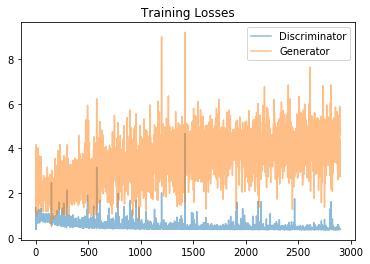

In [49]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()

## Generator samples from training

View samples of images from the generator, and answer a question about the strengths and weaknesses of your trained models.

In [5]:
# helper function for viewing a list of passed in sample images
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(16,4), nrows=2, ncols=8, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach().cpu().numpy()
        img = np.transpose(img, (1, 2, 0))
        img = ((img + 1)*255 / (2)).astype(np.uint8)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((32,32,3)))

In [1]:
# Load samples from generator, taken while training
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

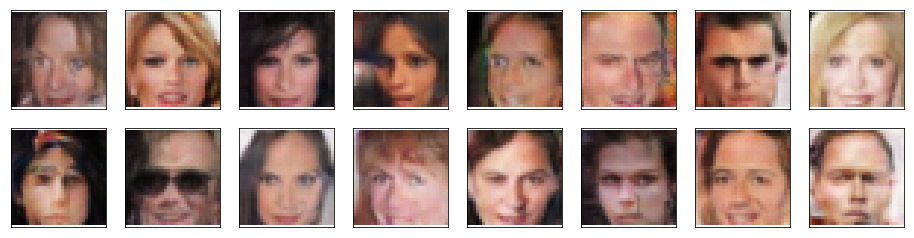

In [52]:
_ = view_samples(-1, samples)

### View some previous samples

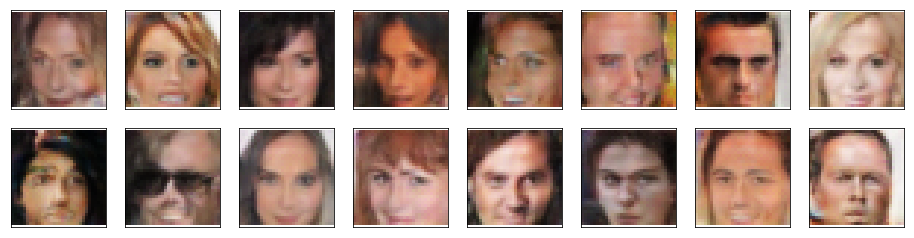

In [8]:
_ = view_samples(-2, samples)

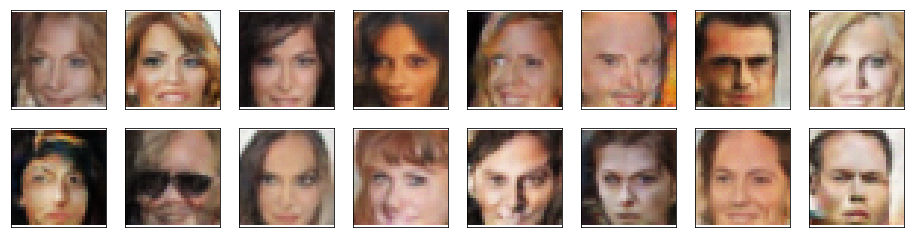

In [9]:
_ = view_samples(-3, samples)

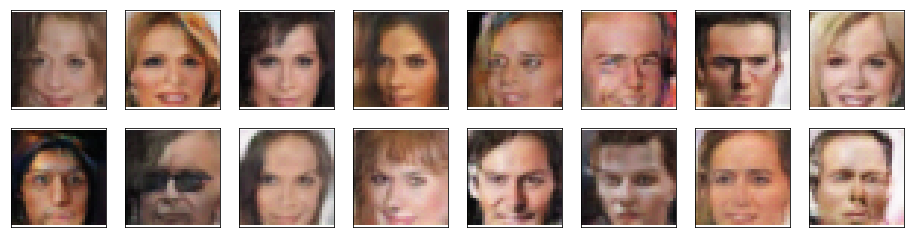

In [10]:
_ = view_samples(-10, samples)

### Question: What do you notice about your generated samples and how might you improve this model?
When you answer this question, consider the following factors:
* The dataset is biased; it is made of "celebrity" faces that are mostly white
* Model size; larger models have the opportunity to learn more features in a data feature space
* Optimization strategy; optimizers and number of epochs affect your final result


**Answer:** 

Hollywood actors are mostly white which is reflected in the dataset. To fix this problem, we could include faces of people of other races. Hollywood is becoming more diverse so in the future the dataset could be improved. Also, the faces from the samples seem all of ages between 30-50 which makes sense because the dataset consists of celebrity images. 

Adding one more convolutional layer or increasing numbers of channels could help the model learn more complex features better. The number of layers is limited because the images are low-resolution. 

Regarding optimization, I could try training for more epochs or try different optimizers (SGD for instance), add dropout layers and decay the learning rate during the training process.

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "problem_unittests.py" files in your submission.